# **Spectral solver for two-dimensional diffusion equation**
Diffusion equation
$$
\frac{\partial c}{\partial t} = D\nabla^2 c$$
Time integration using Euler method
$$
c_{t+1} = c_{t} + \Delta t D\nabla^{2}c
$$
Fourier transform
$$
\hat c_{t+1} = \hat  c_{t} - \Delta t Dk^2 \hat{c_t}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nx, ny = 128, 128 # number of computational grids along x and y directions
dx = dy = 0.5 # spacing of finite difference grids [m]
D = 0.3 # diffusion coefficient [m2/s]
nsteps = 10000 # number of time steps
dt = 0.01 # time increment for 1 time step
c0 = 1.0 # initial concentration in a high concentration region

In [ ]:
c = np.zeros([nx, ny])
c_new = np.zeros([nx, ny])
c_k = np.zeros([nx, ny])
c_new_k = np.zeros([nx, ny])

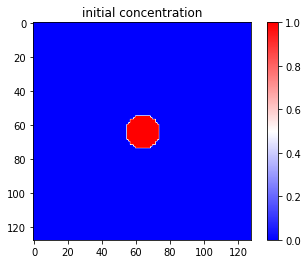

In [ ]:
r = 5.0 # radius of the high-concentration region
x0 = nx/2 # central potition of the high-concentration region
y0 = ny/2
for i in range(nx):
    for j in range(ny):
        r2 = (i*dx-x0*dx)**2 + (j*dy-y0*dx)**2
        if r2 < r**2:
            c[i,j] = c0

In [ ]:
def calc_wave_vector(nx, ny, dx, dy):
    half_nx = int(nx/2)
    half_ny = int(ny/2)
    dkx = (2.0 * np.pi) / (nx * dx)
    dky = (2.0 * np.pi) / (ny * dy)
    k2 = np.zeros([nx, ny])
    
    for i in range(nx):
      if i < half_nx:
        kx = i*dkx
      else:
        kx = (i-nx)*dkx
      kx2 = kx**2

      for j in range(ny):
        if j < half_ny:
          ky = j*dky
        else:
          ky = (j-ny)*dky
        ky2 = ky**2

        k2[i,j] = kx2 + ky2       
    return k2

k2 = calc_wave_vector(nx, ny, dx, dy)

[[0.         0.00963829 0.03855314 ... 0.08674457 0.03855314 0.00963829]
 [0.00963829 0.01927657 0.04819143 ... 0.09638286 0.04819143 0.01927657]
 [0.03855314 0.04819143 0.07710628 ... 0.12529771 0.07710628 0.04819143]
 ...
 [0.08674457 0.09638286 0.12529771 ... 0.17348914 0.12529771 0.09638286]
 [0.03855314 0.04819143 0.07710628 ... 0.12529771 0.07710628 0.04819143]
 [0.00963829 0.01927657 0.04819143 ... 0.09638286 0.04819143 0.01927657]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


nstep =  1000 time =  10.41


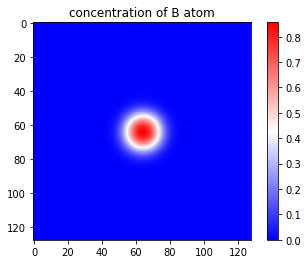

nstep =  2000 time =  20.82


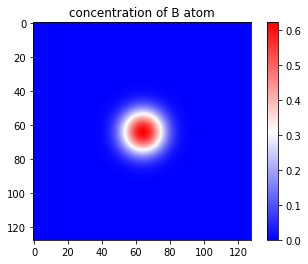

nstep =  3000 time =  31.230000000000004


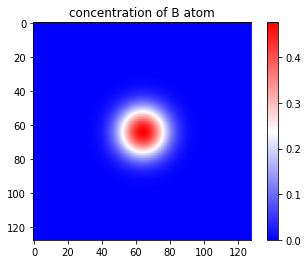

nstep =  4000 time =  41.64


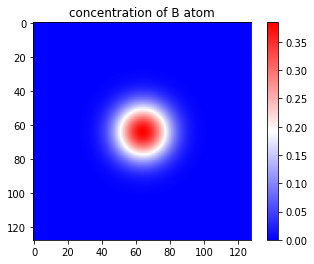

nstep =  5000 time =  52.050000000000004


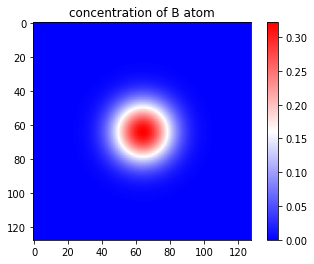

nstep =  6000 time =  62.46000000000001


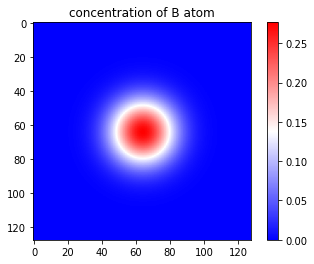

nstep =  7000 time =  72.87


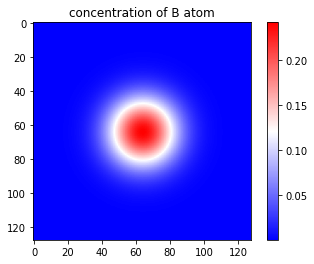

nstep =  8000 time =  83.28


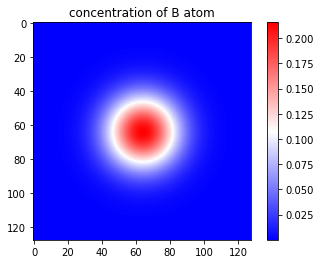

nstep =  9000 time =  93.69000000000001


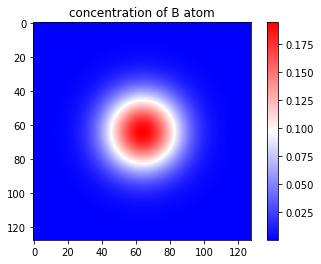

nstep =  10000 time =  104.10000000000001


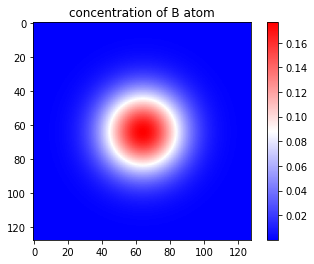

In [ ]:

for istep in range(nsteps+1):

  c_k = np.fft.fftn(c)
  c_new_k[:,:] = c_k[:,:] - dt * D * k2[:,:]  * c_k[:,:] 

  c = np.real(np.fft.ifftn(c_new_k))

  if istep % 1000 == 0:
    print('nstep = ', istep, 'time = ', istep*dt)
    plt.imshow(c, cmap='bwr')
    plt.title('concentration of B atom')
    plt.colorbar()
    plt.show() 